# Distribution Line Defect Detection System Using Mask RCNN
## based on https://github.com/dlmacedo/starter-academic

Setup Python imports

In [3]:
import sys
sys.path.append(os.path.abspath("."))
from src.dataset import CustomDataset
import torch
from src.torchvision import transforms as T
from PIL import Image, ImagePalette
import numpy as np


/content/defect-check-poc


In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

MODEL_PATH = "/content/gdrive/MyDrive/model-2.pth"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Train model

In [9]:
from main import load_model
from src.run_model import run_model
from src.train_model import train_model
from src import config
from src.config import CustomConfig


config = CustomConfig()

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = load_model(config, pretrained=True)
kwargs = {}
if not torch.cuda.is_available():
  kwargs = {"map_location":device}
model.load_state_dict(torch.load(MODEL_PATH, **kwargs))
model = model.to(device)
model = model.eval()
# train_model(model, config, 40)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Save model

In [10]:
# torch.save(model.state_dict(), MODEL_PATH+"3")

Test model

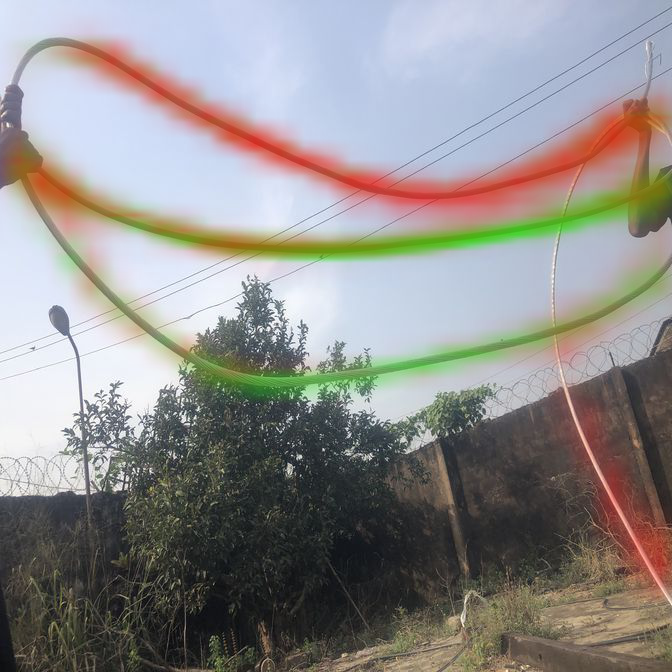

In [22]:
from src.run_model import run_model

from src.train_model import load_model, get_transform
from src.visualize import PALETTE, compose_masks_predicted



dataset = CustomDataset(config, get_transform(False))
#def run_model2(model, image_path = 'data/Compressed/IMG_0949 conv.jpeg'):
img, expected = dataset[26]

model = model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

target = Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy(), "RGB")

compose_masks_predicted(target, prediction[0], True)

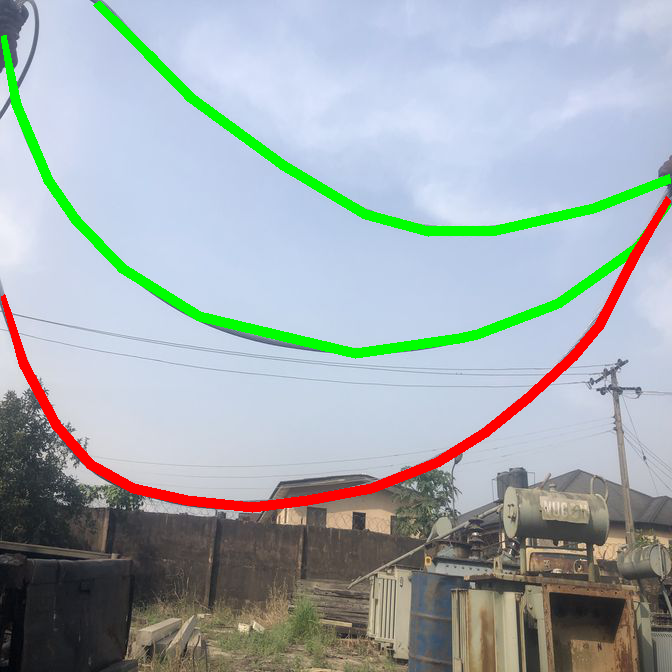

In [12]:

from src.visualize import compose_masks_expected

compose_masks_expected(target, expected)